## 1. Artist Features Analysis
- Graph the top 20 artists (per year) with their popularity score

- graph the artist popularity vs genre

- compare song popularity vs artist popularity


In [2]:
import pandas as pd
df = pd.read_csv("Project_Database_NoOutliers-3.csv")
df =df.drop(columns=["Unnamed: 0"])
df

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly
0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,NaN,-4.667,...,9,1.918977,party,9,1.918977,butterflies,11,19.402985,0,1
1,Green Day,0.567,0.416,159.779,0.2220,21 Guns,75.0,0.0355,NaN,-4.939,...,18,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0,-1
2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,NaN,-6.354,...,7,2.040816,believe,6,1.749271,everything,10,22.448980,0,1
3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,NaN,-3.755,...,10,2.032520,got,10,2.032520,replayayayay,12,12.804878,0,1
4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,NaN,-6.800,...,10,2.949853,so,8,2.359882,everything,10,20.058997,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12123,Lutov Doko,0.564,0.715,76.583,0.2220,Simghera,47.0,0.0536,Energetic,-8.206,...,8,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1
12124,Ramil',0.789,0.457,135.100,0.1160,Из-за тебя,60.0,0.1820,Happy,-8.621,...,8,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1
12125,DYSTINCT,0.760,0.544,100.021,0.2220,Habiba (feat. Tawsen),67.0,0.0539,Energetic,-5.032,...,8,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1
12126,Greg Willen,0.657,0.342,90.006,0.2220,Marvin Vettori - The Italian Dream,63.0,0.1740,Energetic,-4.554,...,8,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1


In [2]:
print(df.columns)

Index(['artist', 'danceability', 'valence', 'tempo', 'liveness', 'song',
       'popularity', 'speechiness', 'mood', 'loudness', 'duration_ms',
       'energy', 'release_date', 'acousticness', 'mode', 'instrumentalness',
       'key', 'year', 'artist_genre', 'artist_popularity', 'artist_followers',
       'hit', 'words_count', 'words_average_size', '1st_word', '1st_occurence',
       '1st_word_percentage', '2nd_word', '2nd_occurence',
       '2nd_word_percentage', '3rd_word', '3rd_occurence',
       '3rd_word_percentage', '4th_word', '4th_occurence',
       '4th_word_percentage', '5th_word', '5th_occurence',
       '5th_word_percentage', 'longest_word', 'longest_word_length',
       'unique_word_percentage', 'Explicitness', 'anomaly'],
      dtype='object')


In [3]:
# Taking account of only artist and related features
df_artists = df[["song","hit","artist_genre","popularity","artist", "artist_popularity", "artist_followers", 'year']]
df_artists

,song,hit,artist_genre,popularity,artist,artist_popularity,artist_followers,year
0,Party In The U.S.A.,1,pop,78.0,Miley Cyrus,83.0,25700084.0,2009.0
1,21 Guns,1,punk,75.0,Green Day,82.0,16334071.0,2009.0
2,The Climb,1,pop,72.0,Miley Cyrus,83.0,25700084.0,2009.0
3,Bad Romance,1,art pop,78.0,Lady Gaga,94.0,35873486.0,2009.0
4,Fireflies,1,pop,78.0,Owl City,69.0,2476635.0,2009.0
...,...,...,...,...,...,...,...,...
12123,Simghera,0,NaN,47.0,Lutov Doko,32.0,929.0,2021.0
12124,Из-за тебя,0,NaN,60.0,Ramil',52.0,403605.0,2021.0
12125,Habiba (feat. Tawsen),0,moroccan pop,67.0,DYSTINCT,69.0,692210.0,2021.0
12126,Marvin Vettori - The Italian Dream,0,italian trap,63.0,Greg Willen,41.0,42083.0,2021.0


In [4]:
# Change to an artist dataset based on artist name
artist_stats = df_artists.groupby("artist").agg(
    total_songs=("song", "count"),
    num_hits=("hit", "sum"),
    artist_popularity=("artist_popularity", "first"), 
    artist_followers=("artist_followers", "first"),
    average_song_popularity=("popularity", 'mean'),
).reset_index()
artist_stats["hit_rate"] =artist_stats["num_hits"]/artist_stats["total_songs"]
artist_stats

,artist,total_songs,num_hits,artist_popularity,artist_followers,average_song_popularity,hit_rate
0,#LikeMe Cast,1,0,52.0,79029.0,41.00,0.0
1,#TocoParaVos,1,0,43.0,318687.0,45.00,0.0
2,$NOT,4,4,65.0,1564409.0,75.75,1.0
3,$atori Zoom,1,1,52.0,104520.0,72.00,1.0
4,$ourJ,2,0,34.0,11960.0,33.00,0.0
...,...,...,...,...,...,...,...
5895,雪二,1,0,38.0,3119.0,58.00,0.0
5896,頑童Mj116,2,0,48.0,276969.0,41.50,0.0
5897,風格童星組合,2,0,39.0,3927.0,41.50,0.0
5898,高爾宣 OSN,1,0,57.0,442666.0,57.00,0.0


<Axes: >

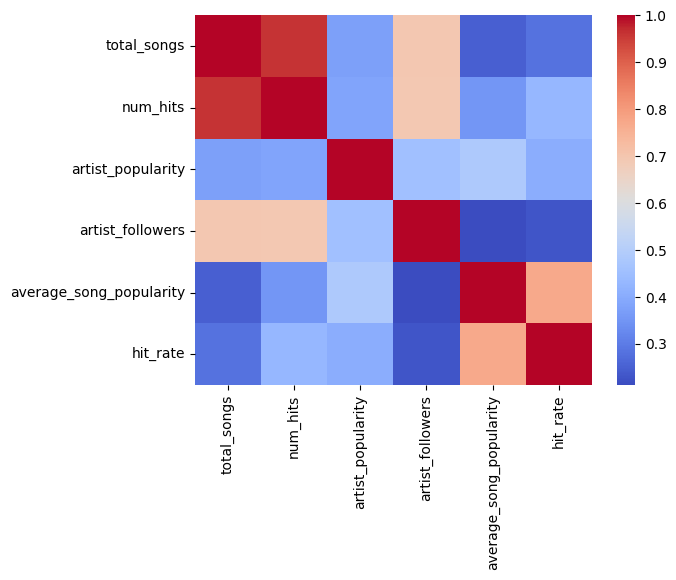

In [ ]:
# Correlation matrix
import seaborn as sns
df_cor = artist_stats.drop(columns=["artist"])

sns.heatmap(df_cor.corr(), annot=False, cmap="coolwarm")

In [7]:
print("Number of artists:", len(df_artists["artist"].unique()))

Number of artists: 5901


### Top 20 Artists
Based on artist_popularity

#### Top 20 artist year 2009 based on number of hits

In [ ]:
df_artist_2009 = df_artists[df_artists["year"]==2009]
artist_stats_2009 = df_artist_2009.groupby("artist").agg(
    total_songs=("song", "count"),
    num_hits=("hit", "sum"),
    artist_popularity=("artist_popularity", "first"),
    artist_followers=("artist_followers", "first")
).reset_index()
artist_stats_2009.sort_values(
    by=["num_hits", "total_songs"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers
70,Miley Cyrus,5,5,83.0,25700084.0
86,Skillet,4,4,74.0,5528574.0
6,Aventura,3,3,80.0,9711558.0
77,OneRepublic,3,3,84.0,18051378.0
78,Owl City,3,2,69.0,2476635.0
10,Black Eyed Peas,2,2,81.0,8828856.0
12,Breaking Benjamin,2,2,73.0,4917925.0
25,Drake,2,2,97.0,97003367.0
36,Florence + The Machine,2,2,79.0,7050783.0
38,Green Day,2,2,82.0,16334071.0


#### Top 20 artist year 2012

In [ ]:
df_artist_2012 = df_artists[df_artists["year"]==2012]
artist_stats_2012 = df_artist_2012.groupby("artist").agg(
    total_songs=("song", "count"),
    num_hits=("hit", "sum"),
    artist_popularity=("artist_popularity", "first"),
    artist_followers=("artist_followers", "first")
).reset_index()
artist_stats_2012.sort_values(
    by=["num_hits", "total_songs"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers
126,One Direction,9,9,85.0,38924767.0
22,Bruno Mars,6,6,95.0,69373144.0
169,Taylor Swift,6,6,97.0,134157353.0
24,Calvin Harris,6,5,86.0,23101892.0
52,Flo Rida,6,5,81.0,8883732.0
64,Imagine Dragons,5,5,87.0,56718470.0
71,Justin Bieber,5,5,90.0,81323370.0
90,Linkin Park,4,4,89.0,29207360.0
109,Maroon 5,4,4,86.0,44362382.0
176,The Weeknd,4,4,97.0,101723619.0


#### Top 20 artist year 2017

In [ ]:
df_artist_2017 = df_artists[df_artists["year"]==2017]
artist_stats_2017 = df_artist_2017.groupby("artist").agg(
    total_songs=("song", "count"),
    num_hits=("hit", "sum"),
    artist_popularity=("artist_popularity", "first"),
    artist_followers=("artist_followers", "first")
).reset_index()
artist_stats_2017.sort_values(
    by=["num_hits", "total_songs"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers
77,Billie Eilish,18,17,95.0,109008635.0
719,XXXTENTACION,14,14,87.0,49432520.0
597,SZA,14,13,95.0,28180341.0
184,Ed Sheeran,12,12,88.0,119565108.0
262,Harry Styles,12,12,83.0,33540698.0
518,Ozuna,11,10,87.0,38264115.0
662,Taylor Swift,11,10,97.0,134157353.0
356,Khalid,10,10,83.0,16652188.0
350,Kendrick Lamar,10,9,97.0,39289255.0
389,Lil Peep,9,9,83.0,14394164.0


#### Top 20 artist year 2021

In [ ]:
df_artist_2021 = df_artists[df_artists["year"]==2021]
artist_stats_2021 = df_artist_2021.groupby("artist").agg(
    total_songs=("song", "count"),
    num_hits=("hit", "sum"),
    artist_popularity=("artist_popularity", "first"), 
    artist_followers=("artist_followers", "first")
).reset_index()
artist_stats_2021.sort_values(
    by=["num_hits", "total_songs"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers
105,Bibi Blocksberg,30,30,79.0,336234.0
653,Seventeen Years Old And Berlin Wall,29,24,26.0,19518.0
392,Kisé,15,15,35.0,30590.0
199,Dree Low,13,13,56.0,243965.0
551,PRO8L3M,13,13,69.0,927776.0
757,Z.E,12,12,49.0,144598.0
91,Bedoes,10,10,13.0,12.0
420,Lil Quil,7,7,44.0,55381.0
64,Asian Tradition Universe,10,5,50.0,120.0
139,Christmas 2018,5,5,14.0,34456.0


#### TOP20 Artist Overall

In [12]:
artist_stats.sort_values(
    by=["num_hits","artist_popularity","artist_followers"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers,average_song_popularity,hit_rate
494,Bad Bunny,67,64,100.0,92541142.0,76.417910,0.955224
4988,Taylor Swift,63,61,97.0,134157353.0,74.841270,0.968254
484,BTS,70,59,87.0,78257250.0,72.757143,0.842857
2521,Juice WRLD,57,55,89.0,39163141.0,77.052632,0.964912
610,Billie Eilish,55,54,95.0,109008635.0,80.000000,0.981818
1379,Drake,50,47,97.0,97003367.0,75.500000,0.940000
350,Ariana Grande,45,45,92.0,104321613.0,78.133333,1.000000
4167,Post Malone,40,39,89.0,46691170.0,78.725000,0.975000
5112,The Weeknd,40,37,97.0,101723619.0,76.975000,0.925000
3940,One Direction,37,36,85.0,38924767.0,75.648649,0.972973


- based on popularity

In [13]:
artist_stats.sort_values(
    by=["artist_popularity"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers,average_song_popularity,hit_rate
494,Bad Bunny,67,64,100.0,92541142.0,76.417910,0.955224
2684,Kendrick Lamar,18,16,97.0,39289255.0,74.944444,0.888889
1379,Drake,50,47,97.0,97003367.0,75.500000,0.940000
5112,The Weeknd,40,37,97.0,101723619.0,76.975000,0.925000
4988,Taylor Swift,63,61,97.0,134157353.0,74.841270,0.968254
4534,SZA,16,15,95.0,28180341.0,76.000000,0.937500
610,Billie Eilish,55,54,95.0,109008635.0,80.000000,0.981818
721,Bruno Mars,23,22,95.0,69373144.0,76.826087,0.956522
2876,Lady Gaga,15,14,94.0,35873486.0,77.866667,0.933333
4140,Pk,1,0,94.0,13802463.0,63.000000,0.000000


- based on artist followers

In [14]:
artist_stats.sort_values(
    by=["artist_followers"], ascending=False
).head(20)

,artist,total_songs,num_hits,artist_popularity,artist_followers,average_song_popularity,hit_rate
354,Arijit Singh,6,1,91.0,139966493.0,58.166667,0.166667
4988,Taylor Swift,63,61,97.0,134157353.0,74.841270,0.968254
1456,Ed Sheeran,38,33,88.0,119565108.0,76.500000,0.868421
610,Billie Eilish,55,54,95.0,109008635.0,80.000000,0.981818
350,Ariana Grande,45,45,92.0,104321613.0,78.133333,1.000000
5112,The Weeknd,40,37,97.0,101723619.0,76.975000,0.925000
1553,Eminem,24,24,91.0,98631229.0,76.083333,1.000000
1379,Drake,50,47,97.0,97003367.0,75.500000,0.940000
494,Bad Bunny,67,64,100.0,92541142.0,76.417910,0.955224
2550,Justin Bieber,34,29,90.0,81323370.0,69.882353,0.852941


#### Plot Top 5 Artist Overall

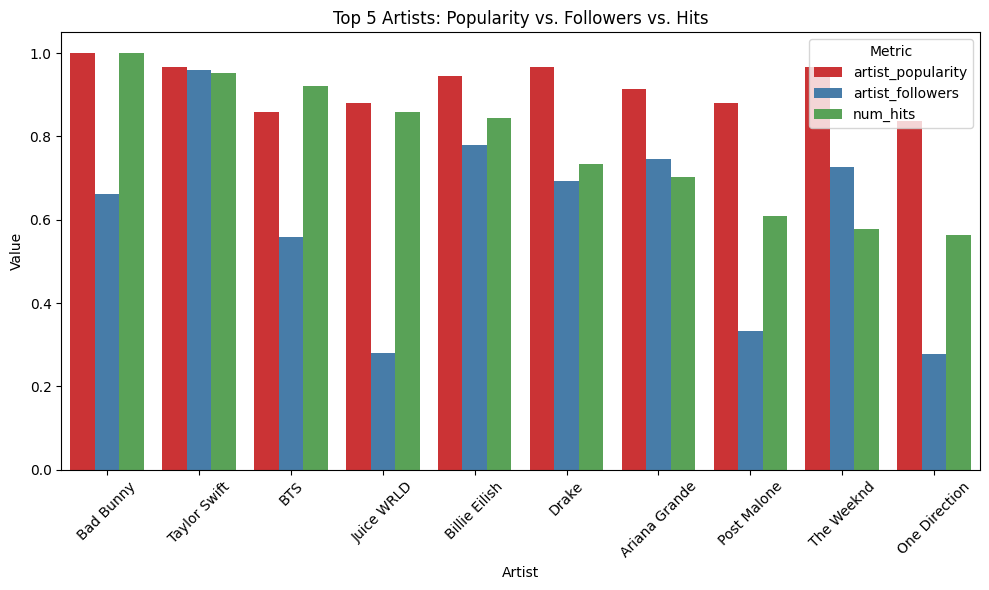

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
artist_stats[["num_hits","artist_popularity","artist_followers"]] = scaler.fit_transform(artist_stats[["num_hits","artist_popularity","artist_followers"]])
top_artists = artist_stats.sort_values(
    by=["num_hits","artist_popularity","artist_followers"], ascending=False
).head(10)
plot_data = top_artists[["artist", "artist_popularity", "artist_followers", "num_hits"]].melt(
    id_vars="artist",
    var_name="Metric",
    value_name="Value"
)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_data,
    x="artist",
    y="Value",
    hue="Metric",
    palette="Set1"
)
plt.title("Top 5 Artists: Popularity vs. Followers vs. Hits")
plt.ylabel("Value")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [16]:
top_artists

,artist,total_songs,num_hits,artist_popularity,artist_followers,average_song_popularity,hit_rate
494,Bad Bunny,67,1.000000,1.000000,0.661166,76.417910,0.955224
4988,Taylor Swift,63,0.953125,0.967391,0.958496,74.841270,0.968254
484,BTS,70,0.921875,0.858696,0.559114,72.757143,0.842857
2521,Juice WRLD,57,0.859375,0.880435,0.279804,77.052632,0.964912
610,Billie Eilish,55,0.843750,0.945652,0.778820,80.000000,0.981818
1379,Drake,50,0.734375,0.967391,0.693047,75.500000,0.940000
350,Ariana Grande,45,0.703125,0.913043,0.745333,78.133333,1.000000
4167,Post Malone,40,0.609375,0.880435,0.333588,78.725000,0.975000
5112,The Weeknd,40,0.578125,0.967391,0.726771,76.975000,0.925000
3940,One Direction,37,0.562500,0.836957,0.278101,75.648649,0.972973


### Artist popularity vs genre 
Graph the artist popularity vs genre

Graph top 20 genre with highest average artist popularity

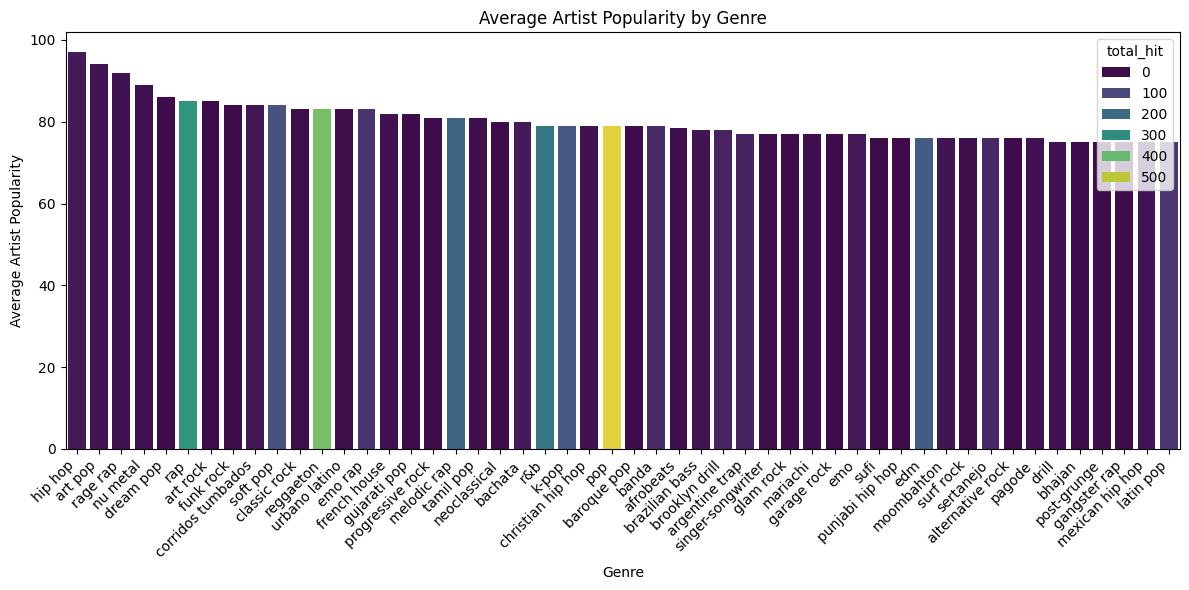

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
genre_popularity = df_artists.groupby(["artist_genre"]).agg(
    avg_artist_popularity=("artist_popularity", "median"),
    total_hit=("hit", "sum")
).reset_index()
genre_popularity = genre_popularity.sort_values("avg_artist_popularity", ascending=False).head(50)
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_popularity, x="artist_genre", y="avg_artist_popularity", palette="viridis", hue="total_hit")
plt.xticks(rotation=45, ha="right")
plt.title("Average Artist Popularity by Genre")
plt.ylabel("Average Artist Popularity")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

Graph for top 20 genres using song popularity

/var/folders/gm/blpfd8fn2ksd_tq8lvr6n6940000gn/T/ipykernel_68574/2531600853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_hit, x="artist_genre", y="total_hit", palette="viridis")


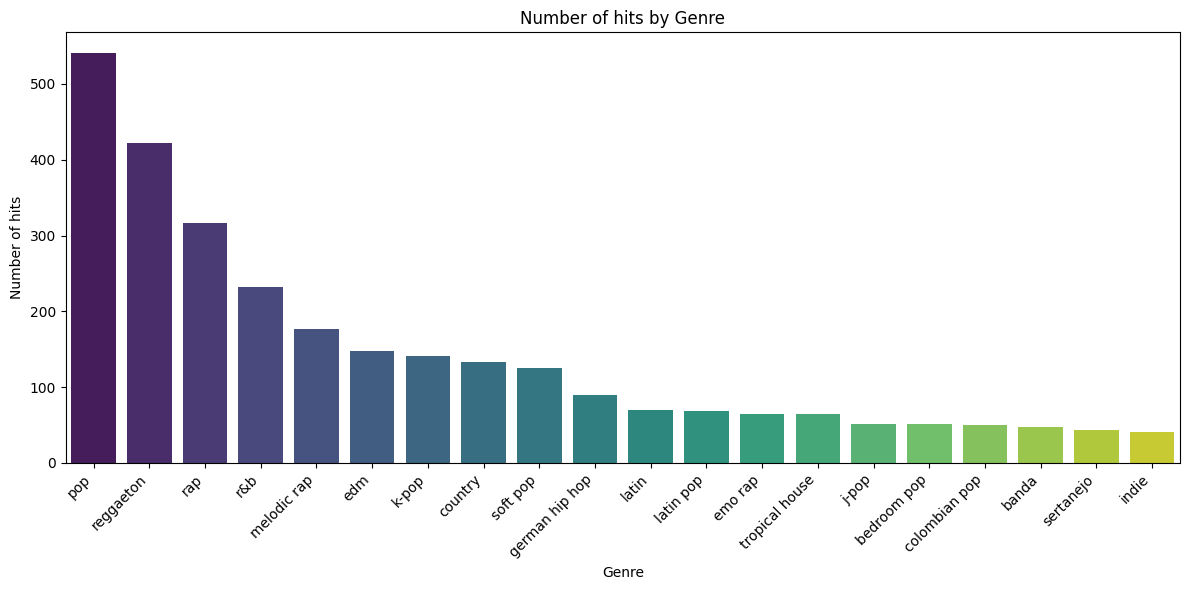

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
genre_hit = df_artists.groupby("artist_genre").agg(
    total_hit=("hit", "sum")
).reset_index()
genre_hit = genre_hit.sort_values("total_hit", ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_hit, x="artist_genre", y="total_hit", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Number of hits by Genre")
plt.ylabel("Number of hits")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

### Trends of song genre over the year

In [5]:
hit_songs = df_artists[df_artists["hit"] == 1]
hit_songs

,song,hit,artist_genre,popularity,artist,artist_popularity,artist_followers,year
0,Party In The U.S.A.,1,pop,78.0,Miley Cyrus,83.0,25700084.0,2009.0
1,21 Guns,1,punk,75.0,Green Day,82.0,16334071.0,2009.0
2,The Climb,1,pop,72.0,Miley Cyrus,83.0,25700084.0,2009.0
3,Bad Romance,1,art pop,78.0,Lady Gaga,94.0,35873486.0,2009.0
4,Fireflies,1,pop,78.0,Owl City,69.0,2476635.0,2009.0
...,...,...,...,...,...,...,...,...
6059,EXTENDO,1,nerdcore,94.0,Dizzy,54.0,93294.0,2021.0
6060,Marek Hamšík,1,epadunk,96.0,Rasmus Gozzi,58.0,86911.0,2021.0
6061,Rich,1,NaN,98.0,Julia Alfrida,17.0,2780.0,2021.0
6062,At Sunset,1,NaN,99.0,Oriental Music Zone,24.0,3306.0,2021.0


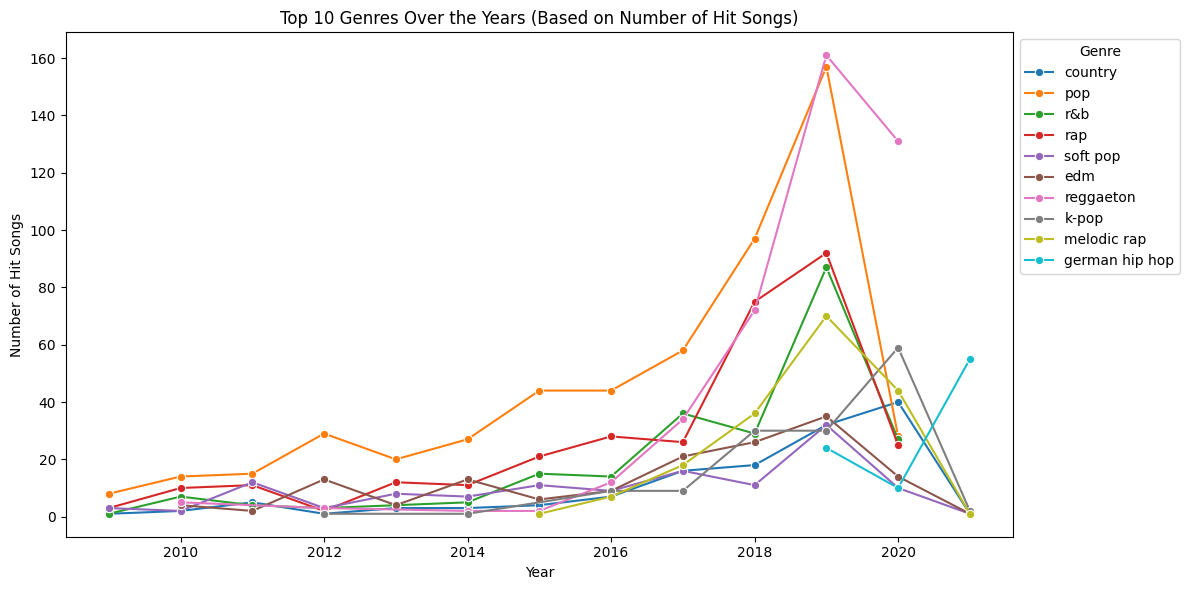

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
genre_trends = hit_songs.groupby(["year", "artist_genre"]).size().reset_index(name="num_hits")
top_genres = (
    hit_songs["artist_genre"]
    .value_counts()
    .head(10)
    .index
)
genre_trends_top10 = genre_trends[genre_trends["artist_genre"].isin(top_genres)]
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=genre_trends_top10,
    x="year",
    y="num_hits",
    hue="artist_genre",
    marker="o",
    palette="tab10"
)
plt.title("Top 10 Genres Over the Years (Based on Number of Hit Songs)")
plt.xlabel("Year")
plt.ylabel("Number of Hit Songs")
plt.legend(title="Genre", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Compare song popularity vs artist popularity

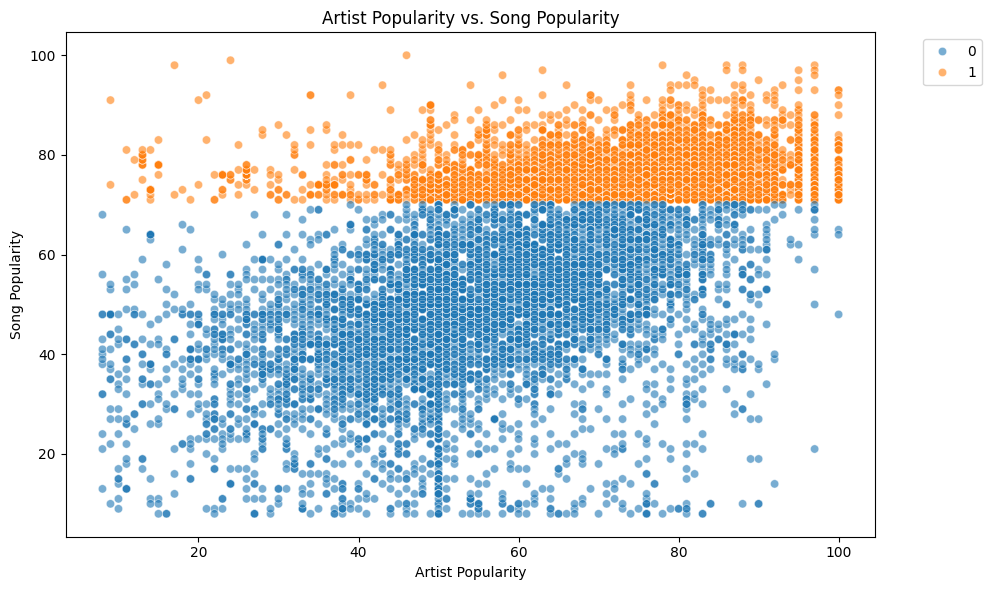

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_artists,
    x="artist_popularity",
    y="popularity",
    hue="hit",  # optional: color by genre
    alpha=0.6
)
plt.title("Artist Popularity vs. Song Popularity")
plt.xlabel("Artist Popularity")
plt.ylabel("Song Popularity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Artist popularity for hit songs varies, but a lot of them is from the range above 50.
Artist popularity smaller than 50 will have less change to create a hit song

In [22]:
corr = df_artists[["artist_popularity", "popularity"]].corr().iloc[0, 1]
print(f"Correlation: {corr:.2f}")

Correlation: 0.57


## 2. PCA

## Taking care of categorical and text data

In [23]:
df

,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,loudness,...,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly,genre
0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,NaN,-4.667,...,1.918977,party,9,1.918977,butterflies,11,19.402985,0,1,pop
1,Green Day,0.567,0.416,159.779,0.2220,21 Guns,75.0,0.0355,NaN,-4.939,...,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0,-1,punk
2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,NaN,-6.354,...,2.040816,believe,6,1.749271,everything,10,22.448980,0,1,pop
3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,NaN,-3.755,...,2.032520,got,10,2.032520,replayayayay,12,12.804878,0,1,pop
4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,NaN,-6.800,...,2.949853,so,8,2.359882,everything,10,20.058997,0,1,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12123,Lutov Doko,0.564,0.715,76.583,0.2220,Simghera,47.0,0.0536,Energetic,-8.206,...,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1,NaN
12124,Ramil',0.789,0.457,135.100,0.1160,Из-за тебя,60.0,0.1820,Happy,-8.621,...,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1,NaN
12125,DYSTINCT,0.760,0.544,100.021,0.2220,Habiba (feat. Tawsen),67.0,0.0539,Energetic,-5.032,...,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1,pop
12126,Greg Willen,0.657,0.342,90.006,0.2220,Marvin Vettori - The Italian Dream,63.0,0.1740,Energetic,-4.554,...,2.056657,Not Found,7,1.804124,Not Found,10,19.277108,0,1,rap


In [38]:
data = df.drop(columns=["artist","song","longest_word","1st_word", "2nd_word", "3rd_word", "4th_word", "5th_word","release_date"])
data.columns
# data = df

Index(['danceability', 'valence', 'tempo', 'liveness', 'popularity',
       'speechiness', 'mood', 'loudness', 'duration_ms', 'energy',
       'acousticness', 'mode', 'instrumentalness', 'key', 'year',
       'artist_popularity', 'artist_followers', 'hit', 'words_count',
       'words_average_size', '1st_occurence', '1st_word_percentage',
       '2nd_occurence', '2nd_word_percentage', '3rd_occurence',
       '3rd_word_percentage', '4th_occurence', '4th_word_percentage',
       '5th_occurence', '5th_word_percentage', 'longest_word_length',
       'unique_word_percentage', 'Explicitness', 'anomaly', 'genre',
       'mood_encoded', 'genre_encoded'],
      dtype='object')

### Encoded Categorical Data

In [39]:
# Label encoder for Mood, Genre
from sklearn.preprocessing import LabelEncoder

le_mood = LabelEncoder()
le_genre = LabelEncoder()

data['mood_encoded'] = le_mood.fit_transform(df['mood'])
data['genre_encoded'] = le_genre.fit_transform(df['genre'])
data[["mood_encoded","mood","genre","genre_encoded"]]
data = data.drop(columns=["mood","genre"])

In [ ]:
data_dropna = data.dropna()
data_dropna

,danceability,valence,tempo,liveness,popularity,speechiness,loudness,duration_ms,energy,acousticness,...,4th_occurence,4th_word_percentage,5th_occurence,5th_word_percentage,longest_word_length,unique_word_percentage,Explicitness,anomaly,mood_encoded,genre_encoded
0,0.652,0.470,96.021,0.0886,78.0,0.0420,-4.667,202067.0,0.698,0.00112,...,9,1.918977,9,1.918977,11,19.402985,0,1,4,161
1,0.567,0.416,159.779,0.2220,75.0,0.0355,-4.939,321093.0,0.742,0.05180,...,18,3.180212,14,2.473498,14,5.300353,0,-1,4,164
2,0.336,0.299,161.010,0.1410,72.0,0.0325,-6.354,234520.0,0.602,0.06350,...,7,2.040816,6,1.749271,10,22.448980,0,1,4,161
3,0.696,0.714,119.001,0.0842,78.0,0.0363,-3.755,294573.0,0.921,0.00314,...,10,2.032520,10,2.032520,12,12.804878,0,1,4,161
4,0.513,0.461,180.118,0.1180,78.0,0.0439,-6.800,228347.0,0.661,0.02740,...,10,2.949853,8,2.359882,10,20.058997,0,1,4,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12123,0.564,0.715,76.583,0.2220,47.0,0.0536,-8.206,126501.0,0.499,0.36000,...,8,2.056657,7,1.804124,10,19.277108,0,1,1,217
12124,0.789,0.457,135.100,0.1160,60.0,0.1820,-8.621,220444.0,0.547,0.37400,...,8,2.056657,7,1.804124,10,19.277108,0,1,2,217
12125,0.760,0.544,100.021,0.2220,67.0,0.0539,-5.032,194400.0,0.534,0.45900,...,8,2.056657,7,1.804124,10,19.277108,0,1,1,161
12126,0.657,0.342,90.006,0.2220,63.0,0.1740,-4.554,134667.0,0.854,0.02520,...,8,2.056657,7,1.804124,10,19.277108,0,1,1,170


In [41]:
data_dropna.to_csv("Project_Database_NoOutliers_Encoded.csv")

## Normalized data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
new_data = scaler.fit_transform(data_dropna)

## PCA

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(new_data)

PCA(n_components=0.95)

In [44]:
print(pca.explained_variance_) # proportional to eigenvalues by each dimension
print(pca.explained_variance_ratio_) # ratio (proportion) of variance explained by dimension
print(pca.components_)
print(pca.singular_values_)

[5.66382707 3.22037938 2.71355466 2.42114581 1.67067787 1.33265396
 1.2492449  1.20663829 1.11823133 1.0343025  1.01895992 0.99292189
 0.95590281 0.91456228 0.8637734  0.83907032 0.8254693  0.82085722
 0.783056   0.74573579 0.69092222 0.57633547 0.5290486  0.45328437
 0.3938246  0.33988868]
[0.16181029 0.09200325 0.07752374 0.06916989 0.04772972 0.03807269
 0.03568977 0.03447254 0.03194683 0.02954906 0.02911074 0.02836686
 0.02730926 0.0261282  0.02467721 0.02397146 0.02358289 0.02345113
 0.02237118 0.02130498 0.01973901 0.01646537 0.01511443 0.01294991
 0.0112512  0.0097103 ]
[[ 4.68060762e-03  6.49250637e-03 -1.06630246e-03 -1.25479740e-02
   6.13463059e-02  1.91334859e-03  2.98693545e-02  5.13037225e-03
   1.26108412e-02 -1.84810404e-02  2.07194248e-02 -1.82085047e-02
  -8.05483627e-03 -4.72859945e-02  5.99084396e-02  4.22924229e-02
   6.90223165e-02  1.18370320e-01 -2.30194225e-02  2.80290885e-01
   2.68551593e-01  3.29983147e-01  3.03451672e-01  3.33417945e-01
   3.14044028e-01  3

In [45]:
import numpy as np
var_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
var_ratio_cumulative

array([0.16181029, 0.25381354, 0.33133728, 0.40050717, 0.44823689,
       0.48630958, 0.52199935, 0.55647188, 0.58841872, 0.61796778,
       0.64707852, 0.67544538, 0.70275463, 0.72888283, 0.75356003,
       0.7775315 , 0.80111439, 0.82456552, 0.8469367 , 0.86824168,
       0.88798069, 0.90444606, 0.91956049, 0.9325104 , 0.9437616 ,
       0.95347191])

In [46]:
summary_table = [pca.explained_variance_, pca.explained_variance_ratio_, var_ratio_cumulative]
summary_table = pd.DataFrame(summary_table).T
summary_table.columns =["explained_var", "var_ratio", "var_ratio_cumulative"]
summary_table

,explained_var,var_ratio,var_ratio_cumulative
0,5.663827,0.161810,0.161810
1,3.220379,0.092003,0.253814
2,2.713555,0.077524,0.331337
3,2.421146,0.069170,0.400507
4,1.670678,0.047730,0.448237
5,1.332654,0.038073,0.486310
6,1.249245,0.035690,0.521999
7,1.206638,0.034473,0.556472
8,1.118231,0.031947,0.588419
9,1.034303,0.029549,0.617968


<Axes: ylabel='var_ratio_cumulative'>

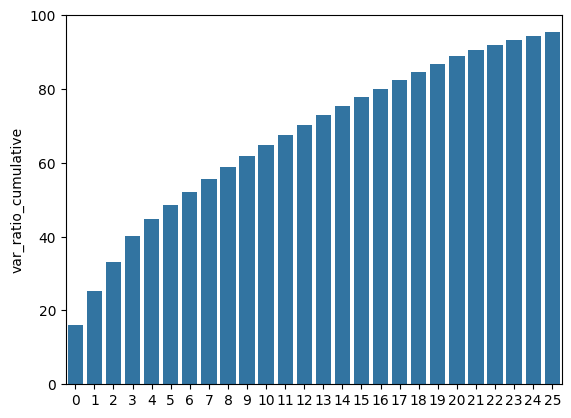

In [49]:
sns.barplot(summary_table*100, y="var_ratio_cumulative", x=range(26))

In [50]:
x = pca.transform(new_data)
x.shape

(12128, 26)

In [55]:
n = new_data.shape[0] # nb of individuals
p = new_data.shape[1] # nb of variables
print(n, '  ', p)
eigval = (n-1) / n * pca.explained_variance_ # eigen values
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p)) # empty matrix for coordinates
for k in range(26):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': data.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1], 'COR_3': corvar[:,2],
                         'COR_4': corvar[:,3], 'COR_5': corvar[:,4], 'COR_6': corvar[:,5], 'COR_7': corvar[:,6],
                         'COR_8': corvar[:,7], 'COR_9': corvar[:,8], 'COR_10': corvar[:,9], 'COR_11': corvar[:,10],})
coordvar

12128    35


,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6,COR_7,COR_8,COR_9,COR_10,COR_11
0,danceability,0.011139,0.059897,0.287465,0.143261,0.624145,-0.031936,0.330680,-0.012837,-0.062954,0.103691,0.303502
1,valence,0.015451,-0.027775,0.286591,0.432070,0.260356,0.158323,0.398241,-0.022610,-0.094782,0.112824,-0.065633
2,tempo,-0.002538,-0.013625,0.074595,0.201391,-0.110808,-0.153201,-0.232205,0.014143,-0.119741,0.043263,-0.360775
3,liveness,-0.029861,-0.045594,0.046163,0.214020,-0.176849,-0.173048,-0.201005,0.052159,0.079381,-0.383591,-0.303704
4,popularity,0.145991,0.366005,0.656551,-0.392089,0.077291,-0.025738,-0.068866,-0.049218,-0.002738,-0.159084,-0.062184
5,speechiness,0.004553,0.028087,0.178692,0.146692,0.491561,-0.299882,-0.008092,0.021199,-0.075293,0.227018,-0.082459
6,loudness,0.071083,0.042196,0.501387,0.573746,-0.227251,0.133522,0.059352,-0.034290,-0.005088,-0.091099,-0.079401
7,duration_ms,0.012209,-0.022731,-0.061081,-0.047881,-0.467486,0.156675,0.030374,-0.093370,0.165086,0.383604,0.112859
8,energy,0.030011,-0.058451,0.370064,0.764179,-0.232236,-0.016324,0.026602,0.019227,0.042609,-0.111794,0.084143
9,acousticness,-0.043981,-0.013705,-0.400562,-0.585730,0.122624,0.140950,0.107123,-0.014424,-0.017222,0.014913,-0.294870


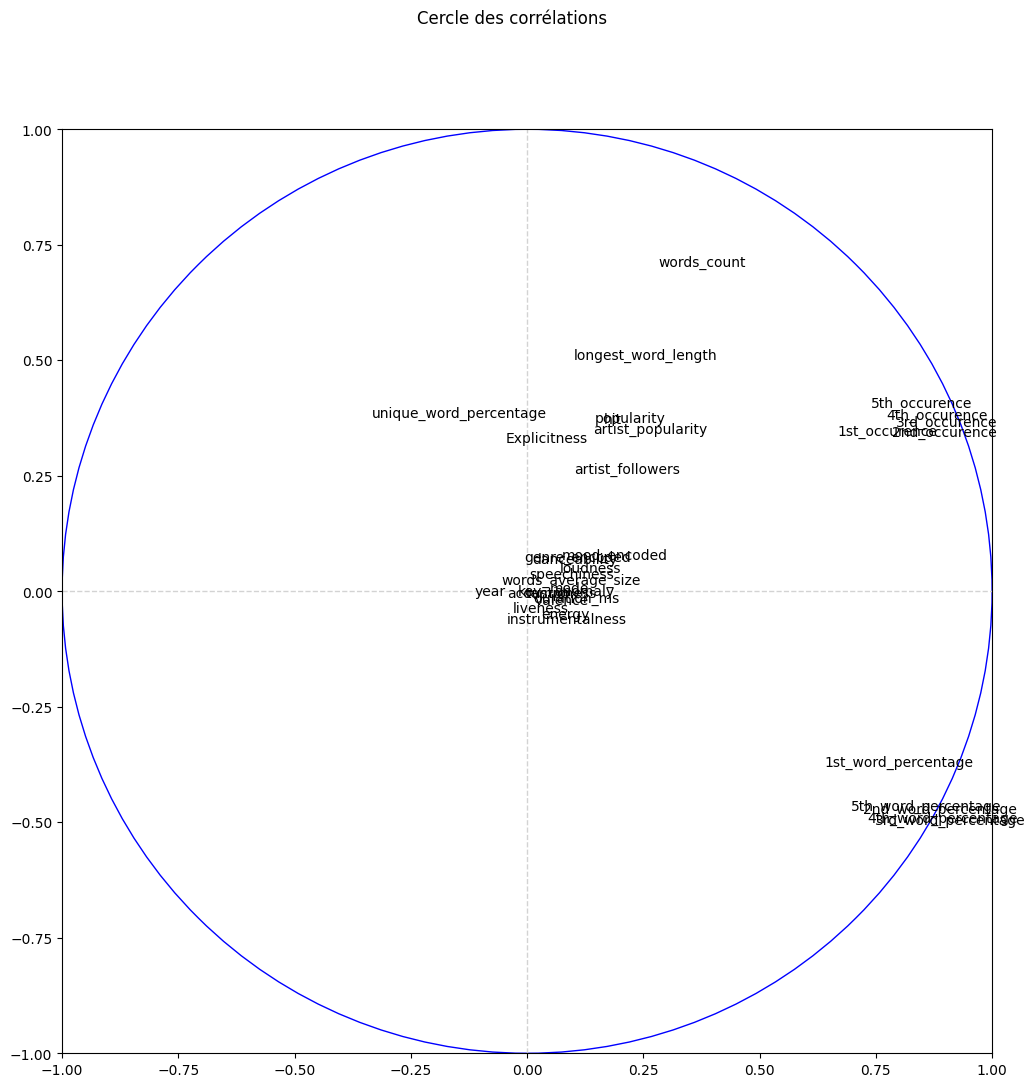

In [56]:
fig, axes = plt.subplots(figsize = (12,12))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

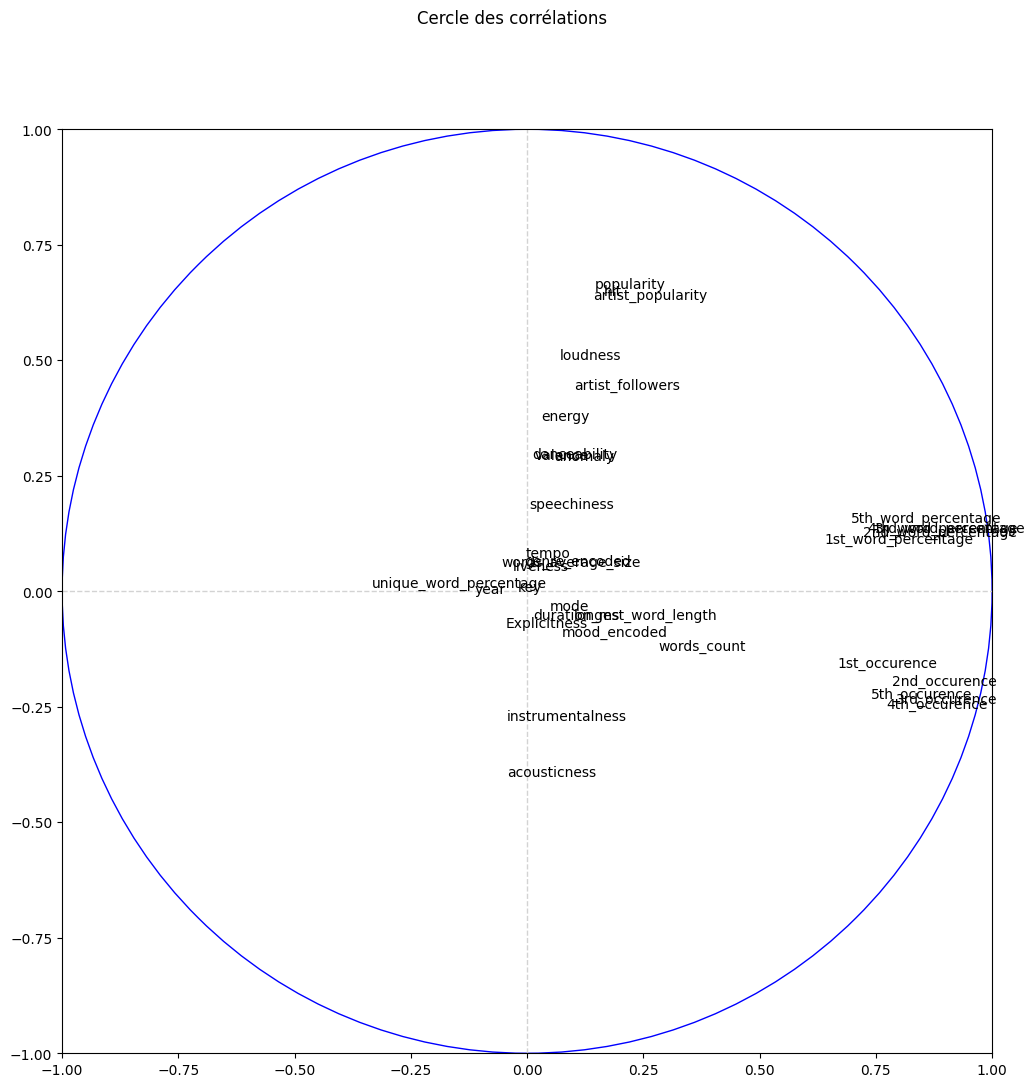

In [57]:
fig, axes = plt.subplots(figsize = (12,12))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_3"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

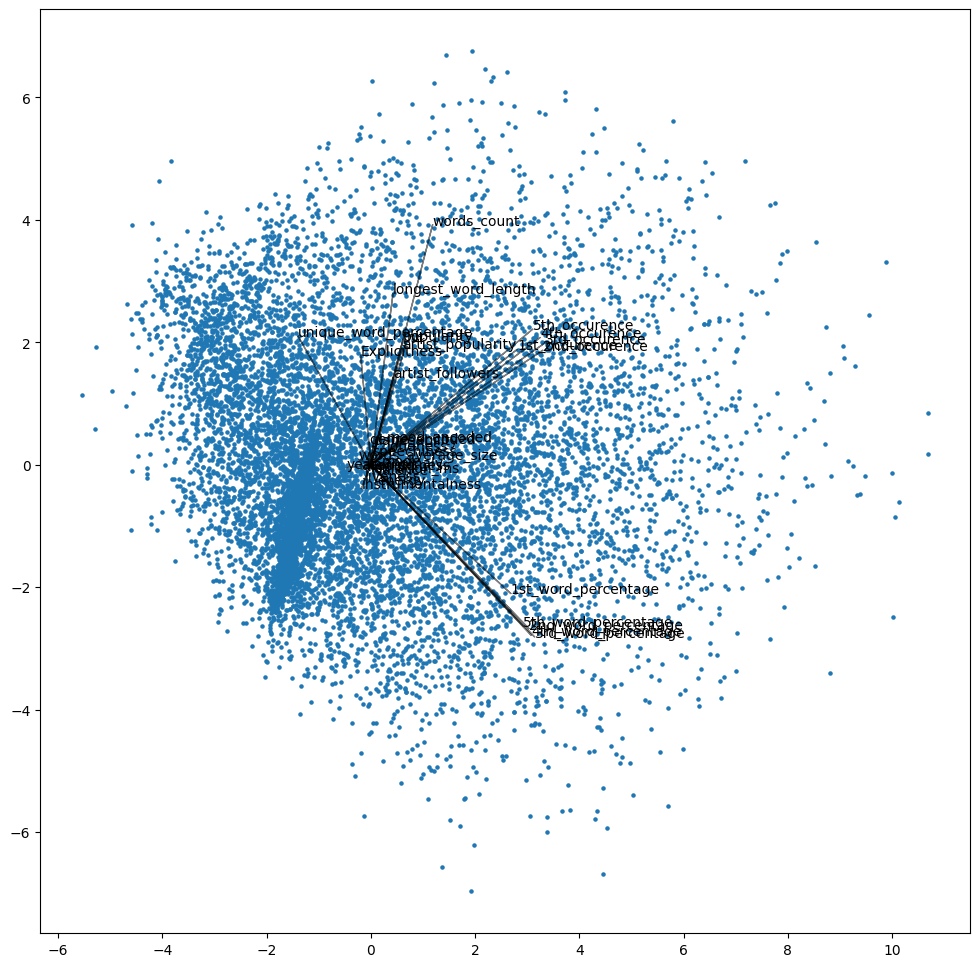

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x[:,0],x[:,1],s=5)
for i in range(pca.components_.shape[1]):
    plt.arrow(0,0,pca.components_[0,i]*10,pca.components_[1,i]*10,alpha=0.5)
    plt.text(pca.components_[0,i]*10,pca.components_[1,i]*10,data.columns[i])

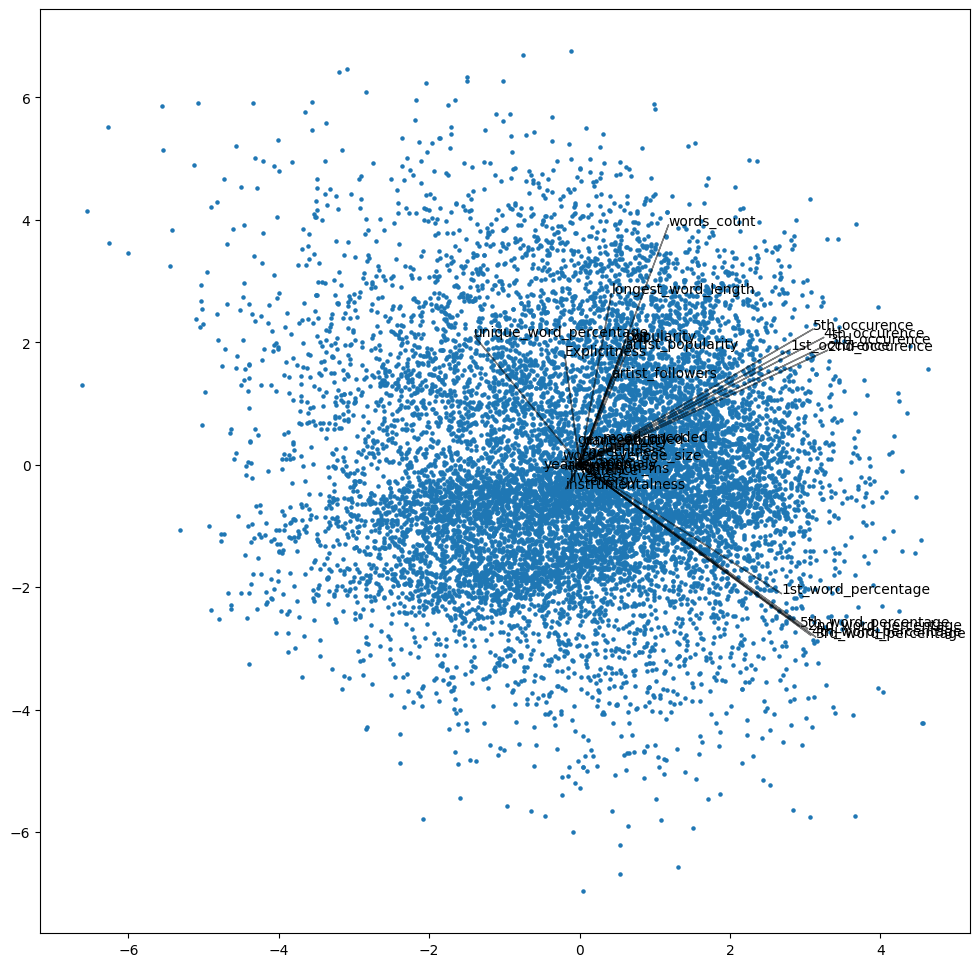

In [62]:
plt.figure(figsize=(12, 12))
plt.scatter(x[:,2],x[:,1],s=5)
for i in range(pca.components_.shape[1]):
    plt.arrow(0,0,pca.components_[0,i]*10,pca.components_[1,i]*10,alpha=0.5)
    plt.text(pca.components_[0,i]*10,pca.components_[1,i]*10,data.columns[i])